In [5]:
#RMSE and MAE

#RMSE is sensitive to outliers hence not to be used when large number of outliers are present



![](images/Screenshot%20from%202022-10-11%2021-15-32.png)

![](images/Screenshot%20from%202022-10-11%2021-16-05.png)

In [6]:
import os, tarfile, urllib
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url = HOUSING_URL, housing_path = HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [7]:
#fetch_housing_data()   No need to run again
#it only fetches the data

In [8]:
import pandas as pd

def housing_data_loader(housing_path = HOUSING_PATH):
    csv_path = os.path.join(housing_path, 'housing.csv')
    return pd.read_csv(csv_path)

In [9]:
housing = housing_data_loader()

In [10]:
housing.head(10)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   
5    -122.25     37.85                52.0        919.0           213.0   
6    -122.25     37.84                52.0       2535.0           489.0   
7    -122.25     37.84                52.0       3104.0           687.0   
8    -122.26     37.84                42.0       2555.0           665.0   
9    -122.25     37.84                52.0       3549.0           707.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
5       413.0       193.0         4.0368            269700.0        NEAR BAY  
6      1094.0       514.0         3.6591            299200.0        NEAR BAY  
7      1157.0       647.0         3.1200            241400.0        NEAR BAY  
8      1206.0       595.0         2.0804            226700.0        NEAR BAY  
9      1551.0       714.0         3.6912            261100.0        NEAR BAY

In [11]:
#here each row represents each districts
#hence we have a dataset of 20640 districts
print(housing.shape)
housing.info()
#ocean_proximity is object Dtype means it can hold any type of data
#But since we loaded a csv file it is definitely text

(20640, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [12]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [13]:
#looking at other fields
housing.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

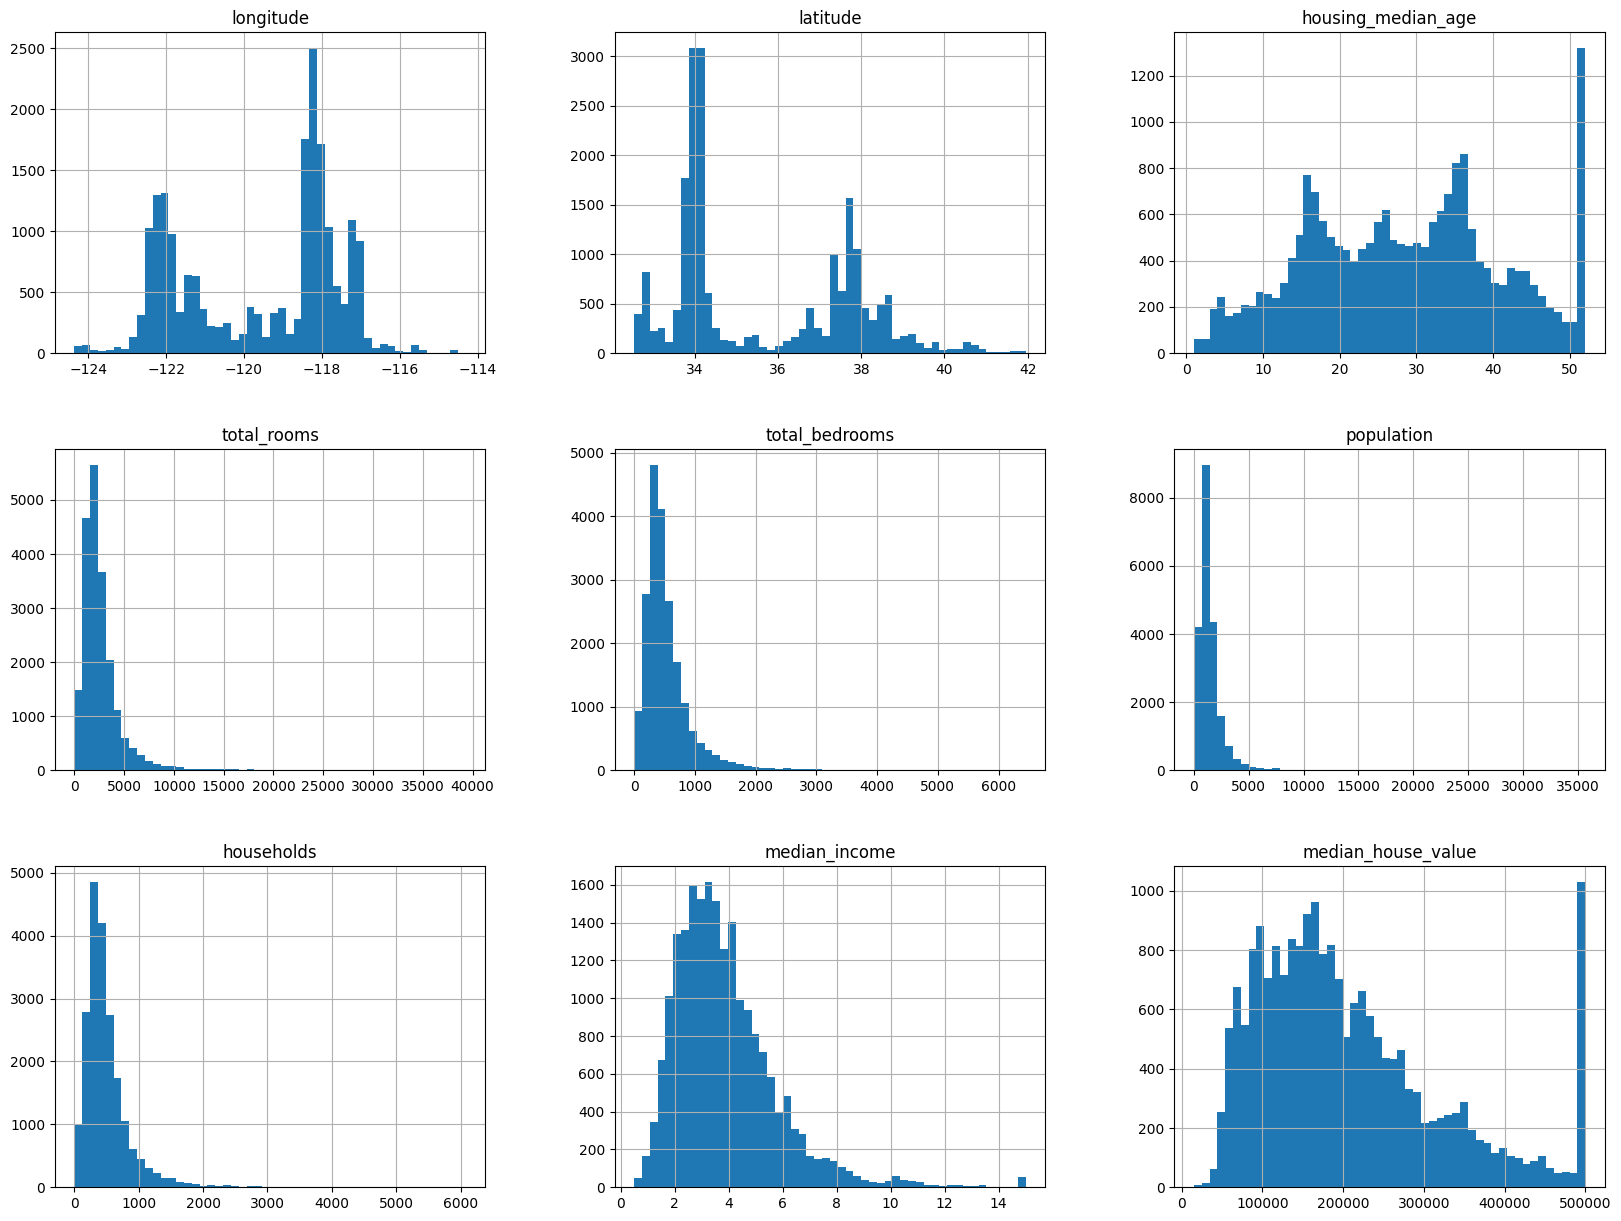

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
housing.hist(bins = 50, figsize=(20,15))

plt.show()

#### Train test split

In [15]:
#we will define a function to do so

import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * 0.2)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [16]:
train_set, test_set = split_train_test(housing, 0.2)
len(train_set), len(test_set)

(16512, 4128)

In [17]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [18]:
#But the housing dataset has no unique identifier column
#so we make one by resetting index

housing_with_id = housing.reset_index() #adds an index column

train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [19]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
housing_with_id #unique identifier by adding long and lat

index  longitude  latitude  housing_median_age  total_rooms  \
0          0    -122.23     37.88                41.0        880.0   
1          1    -122.22     37.86                21.0       7099.0   
2          2    -122.24     37.85                52.0       1467.0   
3          3    -122.25     37.85                52.0       1274.0   
4          4    -122.25     37.85                52.0       1627.0   
...      ...        ...       ...                 ...          ...   
20635  20635    -121.09     39.48                25.0       1665.0   
20636  20636    -121.21     39.49                18.0        697.0   
20637  20637    -121.22     39.43                17.0       2254.0   
20638  20638    -121.32     39.43                18.0       1860.0   
20639  20639    -121.24     39.37                16.0       2785.0   

       total_bedrooms  population  households  median_income  \
0               129.0       322.0       126.0         8.3252   
1              1106.0      2401.0      1138.0         8.3014   
2               190.0       496.0       177.0         7.2574   
3               235.0       558.0       219.0         5.6431   
4               280.0       565.0       259.0         3.8462   
...               ...         ...         ...            ...   
20635           374.0       845.0       330.0         1.5603   
20636           150.0       356.0       114.0         2.5568   
20637           485.0      1007.0       433.0         1.7000   
20638           409.0       741.0       349.0         1.8672   
20639           616.0      1387.0       530.0         2.3886   

       median_house_value ocean_proximity         id  
0                452600.0        NEAR BAY -122192.12  
1                358500.0        NEAR BAY -122182.14  
2                352100.0        NEAR BAY -122202.15  
3                341300.0        NEAR BAY -122212.15  
4                342200.0        NEAR BAY -122212.15  
...                   ...             ...        ...  
20635             78100.0          INLAND -121050.52  
20636             77100.0          INLAND -121170.51  
20637             92300.0          INLAND -121180.57  
20638             84700.0          INLAND -121280.57  
20639             89400.0          INLAND -121200.63  

[20640 rows x 12 columns]

#### Same using Sklearn

In [20]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, random_state=42, test_size=0.2)

In [21]:
#now use pd.cut() function to categorize the median income into several groups



housing['income_cat'] = pd.cut(housing['median_income'], bins=[0.,1.5,3.0,4.5,6.,np.inf], labels=[1,2,3,4,5])

In [22]:
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  \
0       322.0       126.0         8.3252            452600.0        NEAR BAY   
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY   
2       496.0       177.0         7.2574            352100.0        NEAR BAY   
3       558.0       219.0         5.6431            341300.0        NEAR BAY   
4       565.0       259.0         3.8462            342200.0        NEAR BAY   

  income_cat  
0          5  
1          5  
2          5  
3          4  
4          3

<AxesSubplot: >

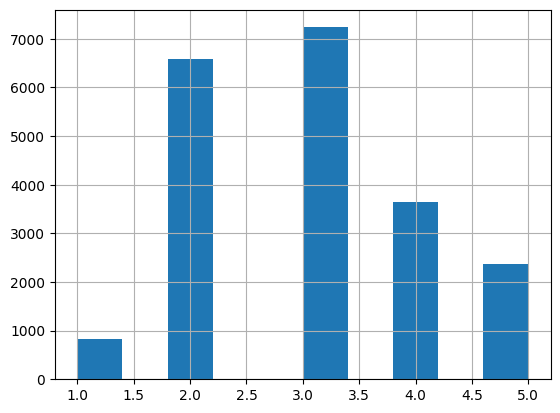

In [23]:
housing['income_cat'].hist()
#now our housing data is stratified

In [24]:
#Now we are ready to do stratified sampling split
from cgi import test
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [25]:
#Let’s see if this worked as expected. You can start by looking at the income
#category proportions in the test set:

strat_test_set['income_cat'].value_counts()/len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [26]:
train_index

array([12655, 15502,  2908, ..., 19263, 19140, 19773])

In [27]:
housing.income_cat.value_counts()/len(housing) #strat_test_set income ratio is simillar to overall dataset income ratio

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [28]:
#Now check with random train test split
train, test = train_test_split(housing, test_size=0.2, random_state=42)

In [29]:
train.income_cat.value_counts()/len(train)

3    0.348595
2    0.317466
4    0.178537
5    0.115673
1    0.039729
Name: income_cat, dtype: float64

In [30]:
#Now remove the income_cat attr so the data is back to its original state

for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

#### Discover and Visualize the Data to Gain Insights

In [32]:
#Visualizing geo data by plotting
import seaborn as sns

<AxesSubplot: xlabel='longitude', ylabel='latitude'>

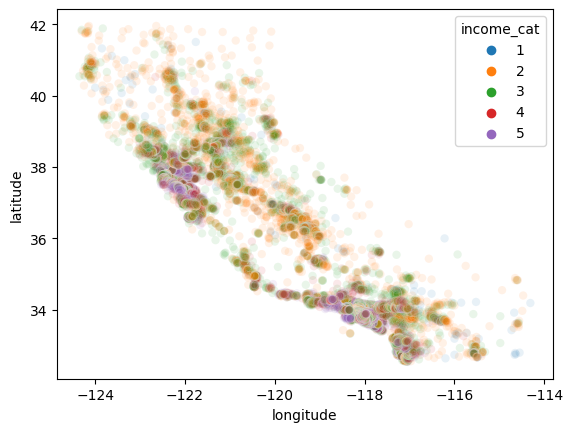

In [33]:
sns.scatterplot(data=housing, x="longitude", y='latitude', hue='income_cat', alpha=0.1)


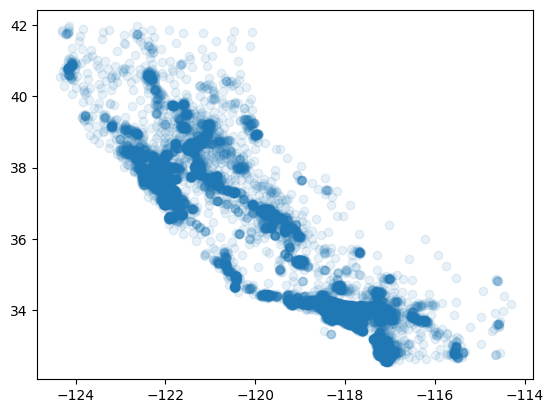

In [34]:
plt.scatter(x=housing.longitude, y=housing.latitude, alpha=0.1)

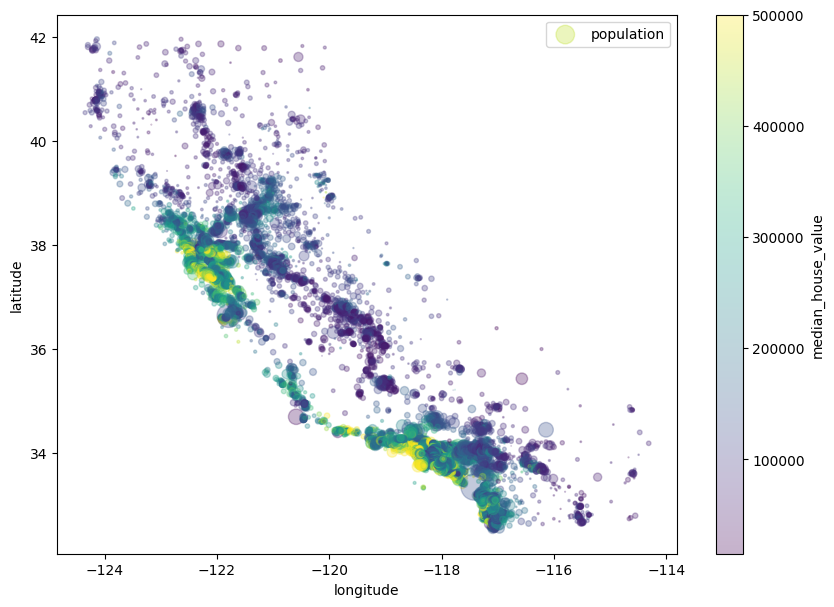

In [35]:
housing.plot(kind='scatter', x = 'longitude', y='latitude', alpha = 0.3,s=housing['population']/100, label = "population", figsize= (10,7),c="median_house_value", cmap = plt.cm.jet, colorbar=True)
plt.legend()

In [36]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'income_cat'],
      dtype='object')

In [37]:
z = housing['median_house_value']

In [39]:
import plotly.express as px
fig = px.scatter(housing,y='latitude', x='longitude',width=800, height=800,opacity=0.25, color='income_cat',size_max=0.01)
fig.show()

#### Looking for Correlations

In [40]:
corr_matrix = housing.corr()

/tmp/ipykernel_96/2466220658.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [41]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

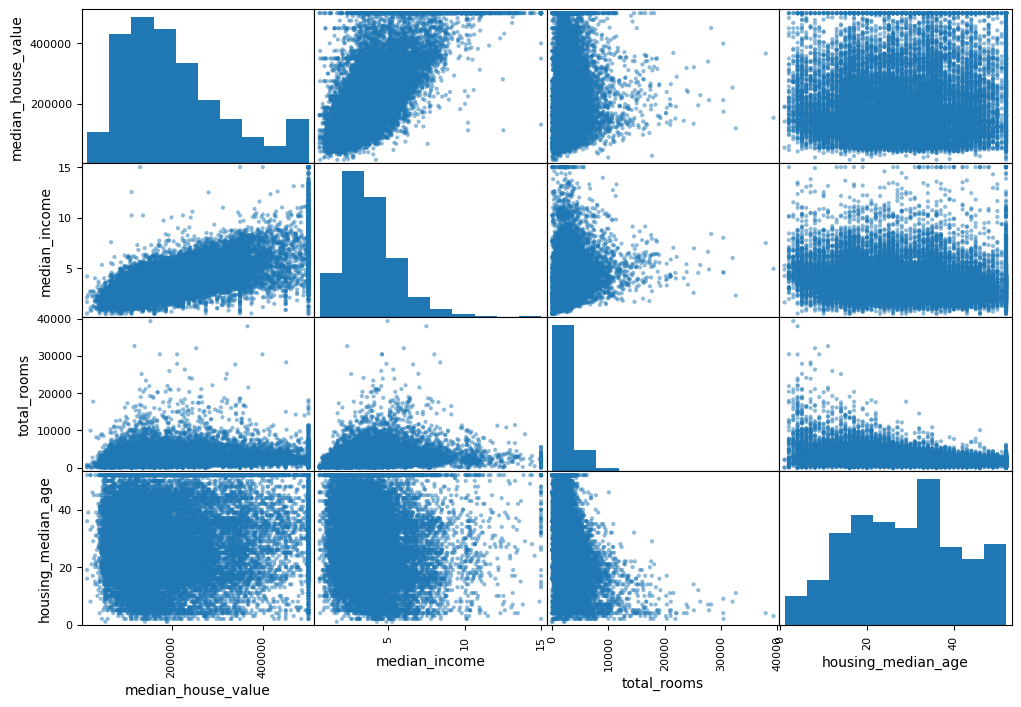

In [42]:
#another way to check correlation
#using scatter_matrix

from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()

In [43]:
#clearly the most proimising attribute to predict the median house value is the median income


<AxesSubplot: xlabel='median_income', ylabel='median_house_value'>

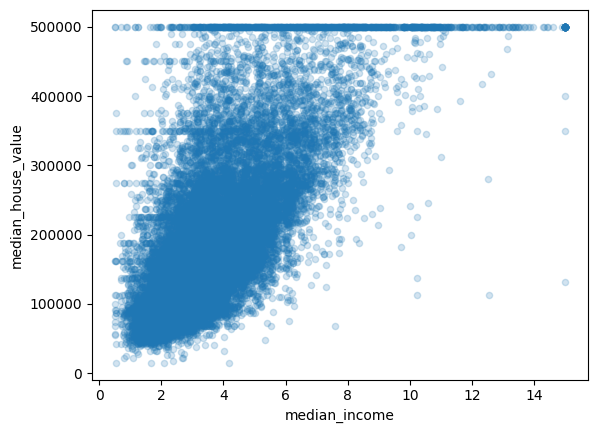

In [44]:
housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.2)

#### Experimenting with Attribute Combinations

In [45]:
#Few less obvious straight lines are visible
#You might want to remove those districts so that the model doesnt learn form that data


In [46]:
#Creating new attributes as per the needs

housing['rooms_per_household'] = housing["total_rooms"]/housing["households"]

housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]

housing["population_per_household"] = housing["population"]/housing["households"]

In [47]:
#Now lets check the correlation again with the newly created columns

corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=True)

/tmp/ipykernel_96/1943992036.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



bedrooms_per_room          -0.255880
latitude                   -0.144160
longitude                  -0.045967
population                 -0.024650
population_per_household   -0.023737
total_bedrooms              0.049686
households                  0.065843
housing_median_age          0.105623
total_rooms                 0.134153
rooms_per_household         0.151948
median_income               0.688075
median_house_value          1.000000
Name: median_house_value, dtype: float64

#### Prepare the data of ML Algos

In [48]:
strat_test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4128 entries, 5241 to 3965
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           4128 non-null   float64
 1   latitude            4128 non-null   float64
 2   housing_median_age  4128 non-null   float64
 3   total_rooms         4128 non-null   float64
 4   total_bedrooms      4079 non-null   float64
 5   population          4128 non-null   float64
 6   households          4128 non-null   float64
 7   median_income       4128 non-null   float64
 8   median_house_value  4128 non-null   float64
 9   ocean_proximity     4128 non-null   object 
dtypes: float64(9), object(1)
memory usage: 354.8+ KB


#### Separating the predictors and the labels

In [49]:
#drop copies the data

housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

#### Data Cleaning

In [50]:
#Three options for missing value

#1 Get rid of the corresponding districts

#2 Get rid of the whole attribute

#3 Set the values to some value (zero, the mean, the median, etc)

##### `housing.drop("total_bedrooms", axis=1)` option 1
##### `housing.dropna(subset=["total_bedrooms"])` option 2
##### `median = housing["total_bedrooms"].median()` option 3
housing["total_bedrooms"].fillna(median, inplace=True)

#### Using Sklearn.impute

In [51]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

In [52]:
#while we cannot compute medians for text attribute
#hence we remove the ocean proximity column

housing_num = housing.drop('ocean_proximity', axis=1)

imputer.fit(housing_num)  #fitting the imputer data

SimpleImputer(strategy='median')

In [53]:
print(imputer.statistics_)   #all computed medians


[-118.51      34.26      29.      2119.       433.      1164.
  408.         3.54155]


In [54]:
housing_num.median().values  #same

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

#### Transforming the data using the Imputer

In [55]:
X = imputer.transform(housing_num)
X   #creates a numpy array

array([[-1.2146e+02,  3.8520e+01,  2.9000e+01, ...,  2.2370e+03,
         7.0600e+02,  2.1736e+00],
       [-1.1723e+02,  3.3090e+01,  7.0000e+00, ...,  2.0150e+03,
         7.6800e+02,  6.3373e+00],
       [-1.1904e+02,  3.5370e+01,  4.4000e+01, ...,  6.6700e+02,
         3.0000e+02,  2.8750e+00],
       ...,
       [-1.2272e+02,  3.8440e+01,  4.8000e+01, ...,  4.5800e+02,
         1.7200e+02,  3.1797e+00],
       [-1.2270e+02,  3.8310e+01,  1.4000e+01, ...,  1.2080e+03,
         5.0100e+02,  4.1964e+00],
       [-1.2214e+02,  3.9970e+01,  2.7000e+01, ...,  6.2500e+02,
         1.9700e+02,  3.1319e+00]])

In [56]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

In [57]:
housing_tr.info()  #no null values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12655 to 19773
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


#### Encoding categorical values to numerical values using encoder

In [58]:
#getting the text attribute of the housing dataset

housing_cat = housing[['ocean_proximity']]
housing_cat


#To categorize we will use sklearn.preprocessing

from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
housing_cat_encoded = encoder.fit_transform(housing_cat)

In [59]:
encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [60]:
#in the above categories the category attrs are really close to each other
#but their value representation using the encoder varies them equally meaning every attribute is highly independent of each other

#so we will perform one hot encoding to create dummy variable for each of the categories

from sklearn.preprocessing import OneHotEncoder

hot_encoder = OneHotEncoder()
housing_cat_1hot = hot_encoder.fit_transform(housing_cat)
housing_cat_1hot   #saved as sparse matrix to save memory ie so that the zeroes dont take any space

#hence to convert it to useful format we can do

housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

#### Custom Transformers

In [98]:
#small transformer class that adds the combined attributes we discussed earlier

from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6


class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): #no *args or *kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix]/ X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [99]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.fit_transform(housing.values)

In [105]:
CombinedAttributesAdder.__bases__

(sklearn.base.BaseEstimator, sklearn.base.TransformerMixin)

In [106]:
housing.values

array([[-121.46, 38.52, 29.0, ..., 706.0, 2.1736, 'INLAND'],
       [-117.23, 33.09, 7.0, ..., 768.0, 6.3373, 'NEAR OCEAN'],
       [-119.04, 35.37, 44.0, ..., 300.0, 2.875, 'INLAND'],
       ...,
       [-122.72, 38.44, 48.0, ..., 172.0, 3.1797, '<1H OCEAN'],
       [-122.7, 38.31, 14.0, ..., 501.0, 4.1964, '<1H OCEAN'],
       [-122.14, 39.97, 27.0, ..., 197.0, 3.1319, 'INLAND']], dtype=object)

#### Feature Scaling

In [107]:
#Feature Scaling

In [108]:
#Two common ways to solve large difference in values in features
#Standardization and #Normalization

In [109]:
#Normalization - values are scaled into 0,1
#value- minvalue/maxvalue -minvalue
#also known as minmax scaler

#hence an outlier can badly effect the rest of the data

In [110]:
#Standardization   - provided my StandardScaler module
#value - mean/stdev



#### Transformation Pipelines

In [111]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([('imputer',SimpleImputer(strategy = 'median')),('attribs_adder', CombinedAttributesAdder()),('std_scaler', StandardScaler())])

In [1]:
housing_num_tr = num_pipeline.fit_transform(housing_num)

NameError: name 'num_pipeline' is not defined

In [120]:
isinstance(housing_num_tr, Pipeline)

False

In [121]:
housing_num_tr

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.01739526,
         0.00622264, -0.12112176],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.56925554,
        -0.04081077, -0.81086696],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.01802432,
        -0.07537122, -0.33827252],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.5092404 ,
        -0.03743619,  0.32286937],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.32814891,
        -0.05915604, -0.45702273],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.01407228,
         0.00657083, -0.12169672]])

In [123]:
#Instead of handling categorical and the numerical columns separately, we will now use a single transformer to handle them both

In [126]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([('num',num_pipeline, num_attribs),("cat",OneHotEncoder(), cat_attribs),])

In [127]:
housing_prepared = full_pipeline.fit_transform(housing)

In [131]:
housing_prepared.shape

((16512, 16), (16512, 11))

#### Select and Train a Model

In [132]:
#Training a linera regression model

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [139]:
#trying out the model on few instances

some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

In [140]:
print('predictions: ', lin_reg.predict(some_data_prepared))

predictions:  [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]


In [141]:
print('labels: ', list(some_labels))

labels:  [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


#### Measuring Accuracy

In [151]:
from sklearn.metrics import mean_squared_error, r2_score

In [146]:
housing_predictions = lin_reg.predict(housing_prepared)

In [147]:
lin_mse = mean_squared_error(housing_labels, housing_predictions)

In [148]:
lin_rmse = np.sqrt(lin_mse)

In [149]:
lin_rmse

68627.87390018745

In [153]:
r2_score(housing_labels, housing_predictions)  #Only 64% of the data is explainable

0.6481553634454353

### Lets try more complex models in this

In [154]:
#Train a Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [160]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse  #error free
#cos testing is on the same training data
#since we wouldnt touch the test dataset until we are confident enough
#we can divide the training set into training and evaluation set using train_test_split

#However a better alternative is K-fold Cross Validation

0.0

#### Better evaluation using Cross validation

In [162]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring='neg_mean_squared_error', cv=10)

tree_rmse_scores = np.sqrt(-scores)

In [163]:
tree_rmse_scores

array([73433.7804401 , 72189.90780678, 68737.64485373, 71375.04042422,
       69572.82141054, 76952.33505513, 71230.17994158, 73291.34017191,
       68751.65801634, 70924.53782333])

In [171]:
def scoredis(scores):
    print('scores: ', scores)
    print('scores mean: ' ,scores.mean())
    print('scores stdev:' ,scores.std())

In [172]:
scoredis(tree_rmse_scores)

scores:  [73433.7804401  72189.90780678 68737.64485373 71375.04042422
 69572.82141054 76952.33505513 71230.17994158 73291.34017191
 68751.65801634 70924.53782333]
scores mean:  71645.92459436698
scores stdev: 2371.8553554146647


#### Applying the crossvalidation before evaluating linear model

In [174]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring='neg_mean_squared_error', cv=10)

In [177]:
lin_scores_rmse = np.sqrt(-lin_scores)

In [178]:
lin_scores_rmse

array([71762.76364394, 64114.99166359, 67771.17124356, 68635.19072082,
       66846.14089488, 72528.03725385, 73997.08050233, 68802.33629334,
       66443.28836884, 70139.79923956])

In [179]:
#scores in lin reg model
scoredis(lin_scores_rmse)

scores:  [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
scores mean:  69104.07998247063
scores stdev: 2880.328209818062


#### Ensemble learning/ RandomForestRegressor

In [188]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()

forest_reg.fit(housing_prepared, housing_labels)
forest_reg_preds = forest_reg.predict(housing_prepared)

In [181]:
forest_reg_scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring='neg_mean_squared_error', cv=10)

In [193]:
r2_score(forest_reg_preds, housing_labels)
np.sqrt(mean_squared_error(housing_labels, forest_reg_preds)) #lower scores mean it is largely overfitting the data

18723.12995343382

In [183]:
forest_reg_rmse = np.sqrt(-forest_reg_scores)

In [185]:
scoredis(forest_reg_rmse)  #slightly better than the both

scores:  [51837.90409432 48909.54798895 46780.4430636  52127.65238355
 47423.51800884 52375.70411674 52585.98409374 49871.89579596
 48371.78359765 53783.08506796]
scores mean:  50406.751821132355
scores stdev: 2318.4851378836925


#### Saving the models

In [194]:
import joblib

In [ ]:
for x in [tree_reg, forest_reg, lin_reg]:
    joblib.dump(x, "{}.pkl".format(x))
    

#to load
#my_model = joblib.load("my_model.pkl")

### Fine-Tune Your 